In [39]:

import numpy as np
import tensorflow as tf


In [40]:
train_dir=r'C:\Users\elham\Desktop\excel2\Train\Train'
test_dir=r'C:\Users\elham\Desktop\excel2\Test'
val_dir=r'C:\Users\elham\Desktop\excel2\Validation\Validation'

In [41]:
# Creating a Dataset for the Training data
train = tf.keras.utils.image_dataset_from_directory(
    train_dir,  # Directory where the Training images are located
    labels = 'inferred', # Classes will be inferred according to the structure of the directory
    label_mode = 'categorical',
    class_names = ['Healthy', 'Powdery', 'Rust'],
    batch_size = 16,    # Number of processed samples before updating the model's weights
    image_size = (256, 256), # Defining a fixed dimension for all images
    shuffle = True,  # Shuffling data
   # seed = seed,  # Random seed for shuffling and transformations
    validation_split = 0, # We don't need to create a validation set from the training set
    crop_to_aspect_ratio = True # Resize images without aspect ratio distortion
)

Found 1322 files belonging to 3 classes.


In [42]:
# Creating a dataset for the Test data
test = tf.keras.utils.image_dataset_from_directory(
    test_dir,  
    labels = 'inferred', 
    label_mode = 'categorical',
    class_names = ['Healthy', 'Powdery', 'Rust'],
    batch_size = 16,    
    image_size = (256, 256), 
    shuffle = True,  
    #seed = seed,  
    validation_split = 0, 
    crop_to_aspect_ratio = True 
)

Found 150 files belonging to 3 classes.


In [43]:
# Creating a dataset for the Test data
validation = tf.keras.utils.image_dataset_from_directory(
    val_dir,  
    labels = 'inferred', 
    label_mode = 'categorical',
    class_names = ['Healthy', 'Powdery', 'Rust'],
    batch_size = 16,    
    image_size = (256, 256),
    shuffle = True,  
    #seed = seed,  
    validation_split = 0, 
    crop_to_aspect_ratio = True 
)

Found 60 files belonging to 3 classes.


In [44]:
print('\nTraining Dataset:',train)


Training Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>


In [45]:
print('\nTraining Dataset:', train)
print('\nTesting Dataset:', test)
print('\nValidation Dataset:', validation)


Training Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

Testing Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

Validation Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>


In [46]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [47]:
scaler=Rescaling(1./255)# Defining scaler values between 0 to 1
train=train.map(lambda x,y:(scaler(x),y))
test=test.map(lambda x,y:(scaler(x),y))
validation=validation.map(lambda x,y:(scaler(x),y))

In [38]:
train

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

Shape of images: (16, 256, 256, 3)
Shape of labels: (16, 3)
Max pixel value in this batch: 1.0
Min pixel value in this batch: 0.0


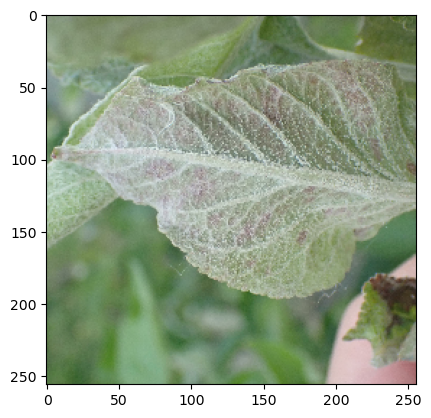

In [54]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from the training dataset
images, labels = next(iter(train))  # Get the first batch from the train dataset

# Print out the shape of the images and labels
print("Shape of images:", images.shape)
print("Shape of labels:", labels.shape)

# Check if the pixel values are in the range [0, 1]
print("Max pixel value in this batch:", images.numpy().max())  # Should be 1.0
print("Min pixel value in this batch:", images.numpy().min())  # Should be 0.0

# Display a sample image from the batch
plt.imshow(images[0])  # Show the first image in the batch
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


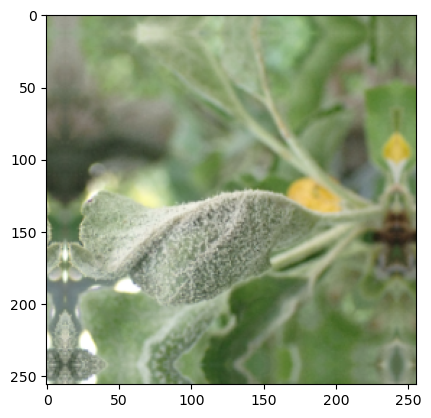

In [60]:
import tensorflow as tf 
from tensorflow.keras.layers import RandomFlip,RandomRotation,RandomZoom,RandomContrast

# Defining the data augmentation pipeline
data_augmentation=tf.keras.Sequential([RandomFlip("horizontal"),RandomRotation(0.2),RandomZoom(0.2),RandomContrast(0.2)])
# Apply the data augmentation to the training set
train_augmented =train.map(lambda x,y:(data_augmentation(x,training=True),y))

import matplotlib.pyplot as plt
images,labels=next(iter(train_augmented))
plt.imshow(images[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


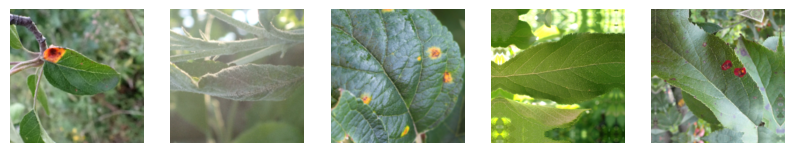

In [62]:




# You can check the result by visualizing a few augmented images
import matplotlib.pyplot as plt

# Get a batch of augmented images and labels
images, labels = next(iter(train_augmented))

# Plot the first 5 images from the batch
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()


In [77]:
# TensorFlow/Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Activation, Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [79]:

model=tf.keras.Sequential()
model.add(data_augmentation)
model.add(Conv2D(32,(3,3),strides=1,padding='same',input_shape=(256,256,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64,(5,5),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))


    

model.add(Conv2D(256, (5,5), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3,activation='softmax'))

In [80]:

model.compile(optimizer=tf.keras.optimizers.RMSprop(0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
    

 



In [81]:
model.fit(train)

83/83 ━━━━━━━━━━━━━━━━━━━━ 583s 7s/step - accuracy: 0.5431 - loss: 2.9597
